<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/scipy_optimize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.optimize import minimize, minimize_scalar, leastsq, curve_fit, brentq
import matplotlib.pyplot as plt


In [ ]:
def grad(f,x0,step=0.00001):
  return (f(x0+step)-f(x0)) / step

In [ ]:
x0 = 0.4523

In [ ]:
print(np.cos(x0))
print(grad(np.sin, x0))
print(abs(np.cos(x0) - grad(np.sin, x0, step=10**-10)))

0.8994443008247227
0.8994421156316433
1.0701778629940151e-07


In [ ]:
def grad2(f: callable, x0: np.array, step: float = 0.00001) -> np.array:
  delta_x = np.array([x0[0] + step, x0[1]])
  delta_y = np.array([x0[0], x0[1] + step])

  x = (f(delta_x)-f(x0)) / step
  y = (f(delta_y)-f(x0)) / step

  return np.array([x[0], y[1]]);

In [ ]:
x0 = np.array([0.1241, 0.15435])

In [ ]:
print('1:', np.cos(x0))

1: [0.99230947 0.98811167]


In [ ]:
print('2:', grad2(np.sin, x0))

2: [0.99230885 0.9881109 ]


In [ ]:
def gradient_descebt(f, x0, learning_rate, max_iteration=100, eps =0.0001):
  x_current = None
  x_prev = x0

  for _ in range(max_iteration):
    x_current = x_prev - learning_rate * grad(f, x_prev)
    if np.linalg.norm(x_current - x_prev) <= eps:
      break
    x_prev = x_current

  return x_current


In [ ]:
def f(x: np.array)-> float:
  # return x ** 2 
  return (x - 10) ** 2 

In [ ]:
x0 = np.array([0.443, 0.231])
x_min = gradient_descebt(f, x0, learning_rate= 0.4)
x_min

array([9.99999011, 9.99999   ])

## Оптимизация скалярной функции

In [ ]:
def scalar_function(x):
  return np.sin(x)*np.exp(-0.1*(x-0.6)**2)


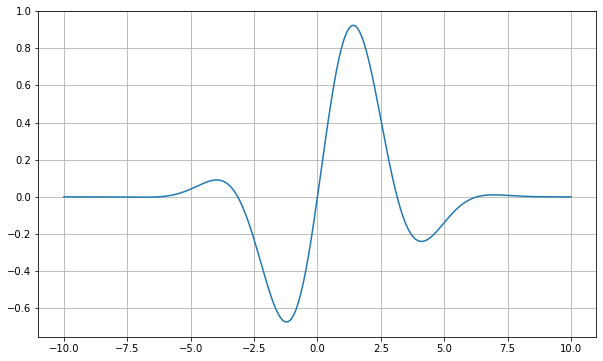

In [ ]:
x =np.linspace(-10, 10, 200)


plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(x, scalar_function(x))

plt.grid()
plt.show()

In [ ]:
result = minimize_scalar(scalar_function)
result

     fun: -0.6743051024666711
    nfev: 15
     nit: 10
 success: True
       x: -1.2214484245210282

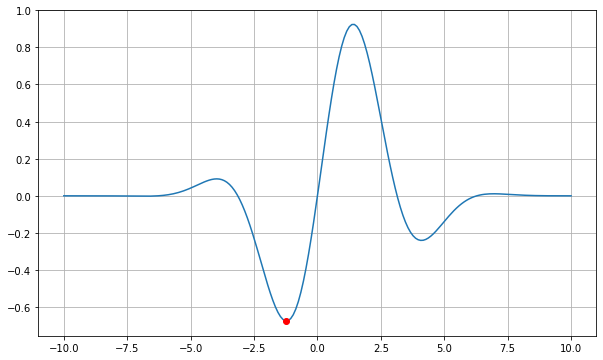

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(x, scalar_function(x))
plt.plot(result['x'], scalar_function(result['x']), 'ro')


plt.grid()
plt.show()

## Ограничения

In [ ]:
bounds = (2.5, 7.5)
result = minimize_scalar(scalar_function, bounds=bounds, method='Bounded' )
result

     fun: -0.24037563941316345
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 4.101465516301833

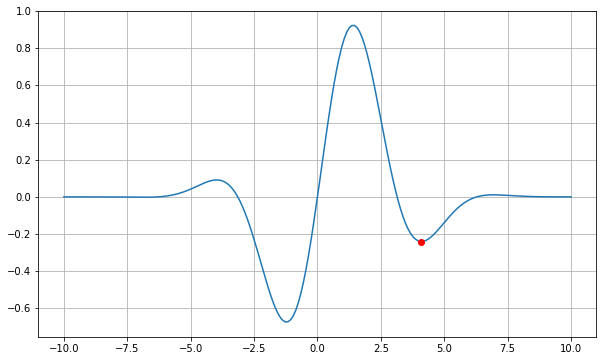

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(x, scalar_function(x))
plt.plot(result['x'], scalar_function(result['x']), 'ro')


plt.grid()
plt.show()

In [ ]:
bounds = (-2.5, 0.0)
result = minimize_scalar(scalar_function, bounds=bounds, method='Bounded' )
result

     fun: -0.6743051024666
 message: 'Solution found.'
    nfev: 10
  status: 0
 success: True
       x: -1.2214480258690215

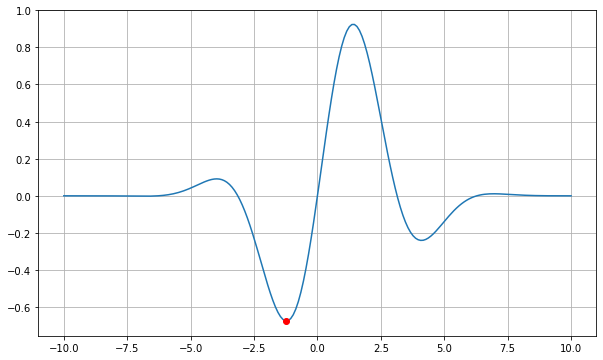

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(x, scalar_function(x))
plt.plot(result['x'], scalar_function(result['x']), 'ro')


plt.grid()
plt.show()


## example - находим стороны коробки

In [ ]:
def S(a):
  return a**2 + 8/a

In [ ]:
x = np.linspace(0, 10, 200)

<ipython-input-27-eb07d4885b30>:2: RuntimeWarning: divide by zero encountered in true_divide
  return a**2 + 8/a


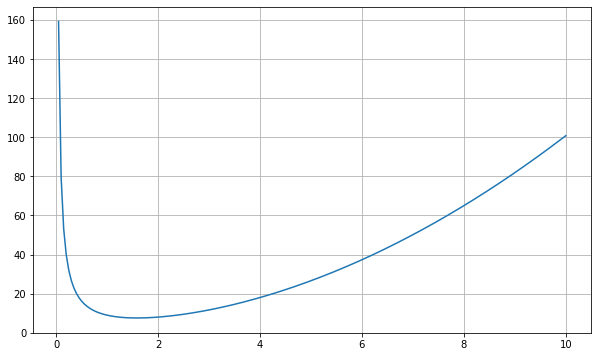

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(x, S(x))

plt.grid()
plt.show();

In [ ]:
result = minimize_scalar(S, bounds= (0.0000001, 200), method='Bounded')
result

     fun: 7.55952629937343
 message: 'Solution found.'
    nfev: 20
  status: 0
 success: True
       x: 1.5873998700120917

<ipython-input-27-eb07d4885b30>:2: RuntimeWarning: divide by zero encountered in true_divide
  return a**2 + 8/a


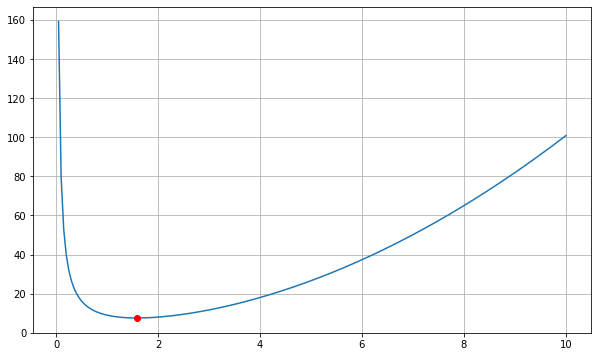

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(x, S(x))
plt.plot(result['x'], S(result['x']), 'ro')

plt.grid()
plt.show();

## Оптимизатор minimize

In [ ]:
result = minimize(S, 4)

In [ ]:
# type(result['x'][0])
result['x']

array([1.58740109])

In [ ]:
def square(x):
  a = x[0]
  b = x[1]
  return a*a + 4*a*b

In [ ]:
def constraint(x):
  a, b = x
  return a*a*b -2

In [ ]:
b = (0,200)
bnds = (b, b)
cons = ({'type':'eq', 'fun': constraint})

In [ ]:
minimize(square, [4, 4], bounds=bnds, constraints=cons )

     fun: 7.559525855198252
     jac: array([6.349603  , 6.34960604])
 message: 'Optimization terminated successfully'
    nfev: 124
     nit: 34
    njev: 33
  status: 0
 success: True
       x: array([1.58740151, 0.7937    ])

## оптимизация функции 

In [ ]:
def fun(args):
  x1, x2, x3, x4 = args
  return x1*x4*(x1+x2+x3)+x3

In [ ]:
b=(1,5)
bnds = (b,b,b,b)

In [ ]:
def cons_1(args):
  x1, x2, x3, x4 = args

  return x1 * x2 * x3 * x4 - 25

def cons_2(args):

  sum = -40
  for el in args:
    sum = sum + el*el

  return sum

cons = ({'type':'ineq', 'fun' : cons_1},
        {'type':'eq', 'fun' : cons_2})

In [ ]:
x0 = [1,5,5,1]
res = minimize(fun, x0, bounds=bnds, constraints=cons)
res

     fun: 17.01401724563517
     jac: array([14.57227015,  1.37940764,  2.37940764,  9.56415057])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.7429961 , 3.82115462, 1.37940765])

In [ ]:
cons_2(res['x'])

8.2353237118582e-08

## метод найменьших квадратов

In [ ]:
t = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([23, 17, 17, 16, 15, 14, 17, 20])

def parabola(t, a, b, c):
    return a * pow(t, 2) + b * t + c

def diff(p, y, t):
    a, b, c = p
    return y - parabola(t, a, b, c)

p0 = (1, 3, 4)
aprx, _ = leastsq(diff, p0, args=(y, t))


In [ ]:
aprx

array([ 0.51785714, -5.0297619 , 26.80357143])

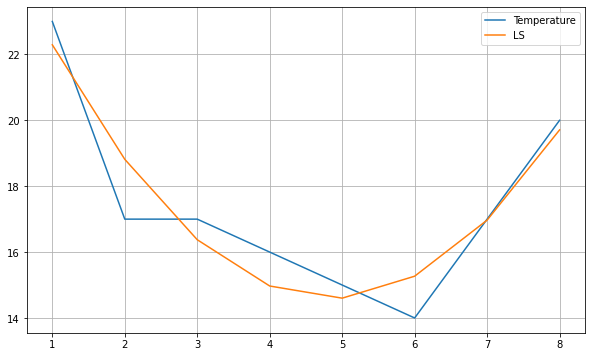

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(t, y, label='Temperature')
plt.plot(t, parabola(t, aprx[0], aprx[1], aprx[2]), label='LS')


plt.grid()
plt.legend()
plt.show();

In [ ]:
def function(t, a, b, c):
    return a * np.sin(t) + b * t + c

def loss(p, y, t):
    a, b, c = p
    return y - function(t, a, b, c)

p0 = (1, 3, 4)
aprx, _ = leastsq(loss, p0, args=(y, t))

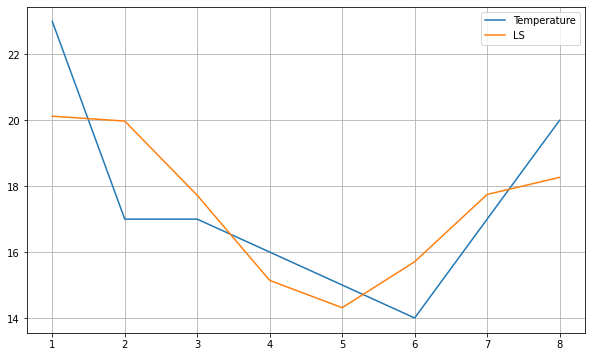

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(t, y, label='Temperature')
plt.plot(t, function(t, aprx[0], aprx[1], aprx[2]), label='LS')


plt.grid()
plt.legend()
plt.show();

In [ ]:
def obj_function(x):
  return 4 * pow(x, 2) + 5 * x + 9

In [ ]:
x = np.linspace(-10, 10, 20)
aprx, _ = leastsq(diff, p0, args=(obj_function(x), x))
aprx

array([4., 5., 9.])

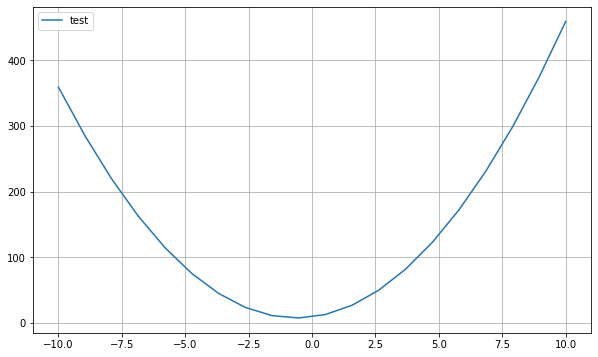

In [ ]:
plt.plot(x, obj_function(x), label='test')

# x_p = aprx[0] * x ** 2 + aprx[1] * x + aprx[2]
# plt.plot(x, obj_function(x_p), label='test-2')

plt.grid()
plt.legend()
plt.show();

In [ ]:
result = curve_fit(parabola, t, y, p0)
result

(array([ 0.51785714, -5.0297619 , 26.80357143]),
 array([[ 0.0084538 , -0.07608418,  0.12680697],
        [-0.07608418,  0.71857285, -1.29343111],
        [ 0.12680697, -1.29343111,  2.76439196]]))

## решение уравненений

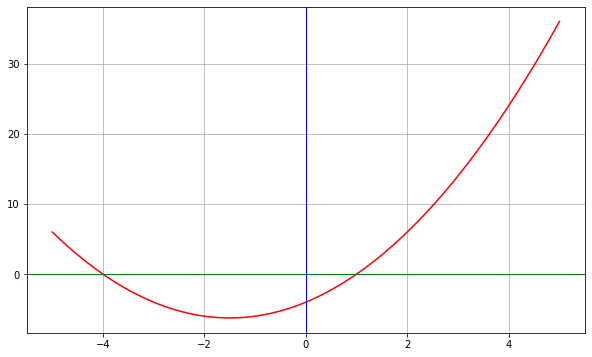

In [ ]:
x = np.linspace(-5, 5, 50)
y = x ** 2 + 3 * x - 4
plt.grid()
plt.plot(x, y, color='r')
plt.axhline(linewidth=1, color='g')
plt.axvline(linewidth=1, color='b')

In [ ]:
def f(x):
  return x**2 +3*x-4

brentq(f, 0, 2)  # -4

0.9999999999999999

# TASK 1

Для прямоугольной области площадью 1000 м2, примыкающей к прямому участку реки, необходимо построить ограду (причем со стороны реки ограду строить не нужно). При каких размерах области a, b длина ограды будет минимальной? Используйте функцию minimize с параметрами ограничениями bounds и constraints

In [ ]:
def fence_length(args):
  a,b = args
  return 2*a + b

def constraint(args):
    a,b = args
    return a*b - 1000

In [ ]:

xbounds = (0, 1000)
ybounds = (0, 1000)
bounds = (xbounds, ybounds)
result = minimize(fence_length, np.array([1000, 1]), bounds=bounds, constraints={'type': 'ineq', 'fun': constraint})
result

     fun: 89.44271938260809
     jac: array([2., 1.])
 message: 'Optimization terminated successfully'
    nfev: 61
     nit: 21
    njev: 20
  status: 0
 success: True
       x: array([22.35890114, 44.72491711])

In [ ]:
# s = 22.35890114 * 44.72491711
# p = (22.35890114 + 44.72491711)*2 - 44.72491711
# p

89.44271939000001

# TASK 2

Во вторая части прошлого домашнего задания мы решали дифференциальные уравнения и строили графики. Продолжаем работать над этой домашней работой дальше.

Необходимо методом наименьших квадратов:

для набора данных графика функции S(t) получить уравнение вида S(t)=S0e^ -at
 
для набора данных графика функции I(t) получить уравнение вида I(t)= (I0+αS0t)e^ -at

Для уравнения R(t) график функции будет R(t)=N−S(t)−I(t)

Построить все три графика S(t), I(t) и R(t) на одной области отображения полученные методом наименьших квадратов

Найти время t max при котором число инфекционных индивидов максимально. 
Надо с помощью метода minimize_scalar найти когда функция I(t) достигает своего максимума.

array([1, 5])